In [26]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

SCT_PATH = '/home/taha/Downloads/Panacea/mri_to_ct/mri_to_ct/24_12_24_final/infer/saved'
CT_PATH = '/home/taha/Downloads/Panacea/dataset/TEST/CT'
sct_dir = sorted(os.listdir(SCT_PATH), key = lambda x: x)
ct_dir = sorted(os.listdir(CT_PATH), key = lambda x: x)

In [36]:
len(sct_dir), len(ct_dir), sct_dir[0], ct_dir[0]

(45, 45, '1BA075_sct.nii.gz', '1BA075_ct.nii.gz')

In [22]:
def load_and_threshold(image_path, threshold=400):
    image = sitk.ReadImage(image_path, sitk.sitkInt16)
    binary_image = sitk.BinaryThreshold(image,
                                        lowerThreshold=threshold,
                                        upperThreshold=3000,
                                        insideValue=1,
                                        outsideValue=0)
    return binary_image

def calculate_dice(segmentation, ground_truth):
    overlap_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_filter.Execute(ground_truth, segmentation)
    dice = overlap_filter.GetDiceCoefficient()
    return dice


In [25]:
dice = []
for sct,ct in zip(sct_dir, ct_dir):
    sct_img = load_and_threshold(os.path.join(SCT_PATH, sct))
    ct_img = load_and_threshold(os.path.join(CT_PATH, ct))

    dice.append(calculate_dice(sct_img, ct_img))

In [29]:
dice

[0.9112101818913287,
 0.9270822181897649,
 0.8171040882430184,
 0.8740596837061496,
 0.8347609992220589,
 0.8672647436829269,
 0.8505024758163927,
 0.9007776743598424,
 0.9082347656325329,
 0.9145348537507156,
 0.8821485426572243,
 0.8977698493025938,
 0.9119447559713226,
 0.9089271300054983,
 0.9293312853115794,
 0.9147499500314895,
 0.8773245150427614,
 0.8818805720552942,
 0.8982394207614771,
 0.9112786424420728,
 0.8575012418711312,
 0.8661348206175707,
 0.8293034303271833,
 0.8536509986765085,
 0.9014101209408358,
 0.8985984907872583,
 0.8748376861515725,
 0.8526405581196972,
 0.804350604479277,
 0.9071224148172148,
 0.8947321318061942,
 0.8271079955455136,
 0.8805720478748469,
 0.8601479691393965,
 0.9042626648690371,
 0.8939764323463676,
 0.8710541956336568,
 0.8627699423339551,
 0.8570682924838824,
 0.8930548023486871,
 0.8511818042108499,
 0.8438894911271717,
 0.8845314211942867,
 0.8899565949609848,
 0.909349667975617]

In [38]:
import numpy as np
np.mean(dice)

0.8797407148603278

Text(0.5, 0, 'dice coefficient')

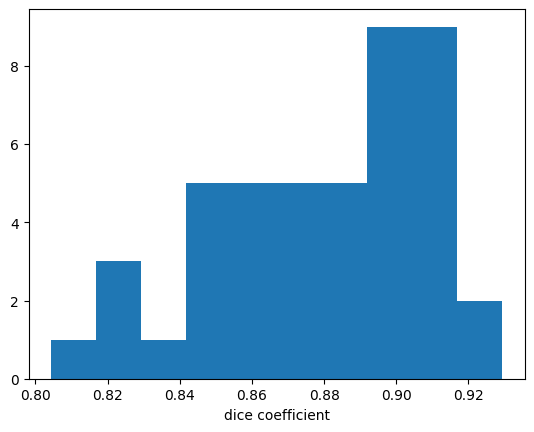

In [28]:
plt.hist(dice)
plt.xlabel('dice coefficient')

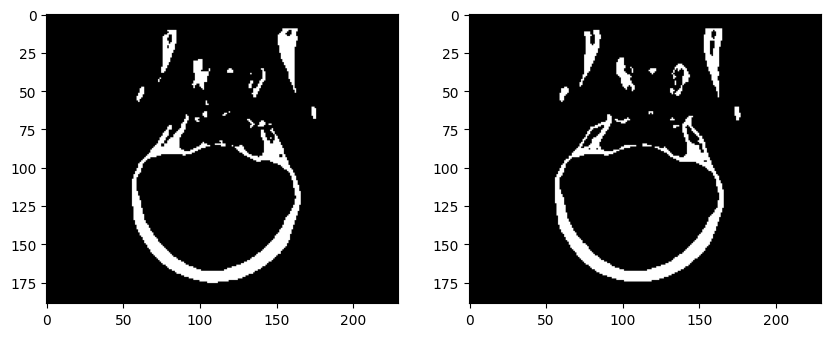

In [35]:
sct_np = sitk.GetArrayFromImage(sct_img)
ct_np = sitk.GetArrayFromImage(ct_img)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(sct_np[:,100,:], cmap='gray')
ax[1].imshow(ct_np[:,100,:], cmap='gray')